<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 0 - Libraries</p>

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">0.1 - Data Presentation</p>

In [1]:
import pandas as pd

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">0.2 - Visualizations</p>

In [2]:
import collections
import math
import matplotlib.pyplot as plt
import numpy as np

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">0.3 - Graphs</p>

In [3]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import louvain_communities, modularity

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 1 - Story</p>

We at Facebook strive to empower individuals with capacities, bridging geographical divides and thus allowing for communal development. As such, we intend to turn Facebook into a global medium for self-expression. Media such as that is also applicable to businesses engaging their customers by way of their self-expression. This renders Facebook a tool for individuals to discover businesses they may be interested in.

My role as a data scientist entails the challenge of discovery so as to make appearances interesting through targeted personalization efforts. This challenge has led to my research on co-liking graphs, concentrating initially on the food vertical of businesses. As a starting point for this research, an analysis experiment will be conducted.

In these experiments, consideration will be given to graph properties, its central nodes, as well as apparent communities. Insights gained through analysis may help suggest food pages, triggering desire, and stimulating interest. As a result, session durations will be prolonged, increasing the likelihood of more advertisements being displayed, and thus monetary value added to Facebook.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 2 - The Data</p>

The __[data](https://networkrepository.com/fb-pages-food.php)__ considered relevant for experimental analysis will be reviewed in the following chapter. More specifically, it will be investigated what it consists of and how it might fit within the experiment context. Should the __[data](https://networkrepository.com/fb-pages-food.php)__ appear valid according to that investigation, it will be used in follow-up analyses.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">2.1 - Data Presentation</p>

The __[data](https://networkrepository.com/fb-pages-food.php)__ in question stems from verified Facebook pages, as indicated by a blue badge, relating exclusively to the food vertical. Food pages comprise nodes with adjacency denoted by edges, signifying mutual liking. As those likes are mutual, the graph type is undirected. Note that nodes and edges within the undirected graph are devoid of attributes and weights.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">2.2 - Data Context</p>

There is evidently a graph structure as indicated by the nodes and edges, giving opportunity for analysis regarding the graph's properties, its central nodes, and its communities. Those nodes correspond to Facebook food pages, whereas the vertical requirement holds. Their edges denote a mutual liking, expressed by an individual, constituting a graph of co-likes. Edges on this graph are also bidirectional, emphasizing the mutuality of a co-like graph. By analyzing a graph of only verified food pages, noise from illegitimate entities can be largely ruled out. As a result, a sound base for experimental analysis is provided.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">2.3 - Data Loading</p>

In [4]:
G = nx.read_edgelist(path = "fb-pages-food.edges",
                     delimiter = ",")

In this cell, the relevant __[data](https://networkrepository.com/fb-pages-food.php)__ for the experimental analysis is read and stored as "G".

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 3 - IDA</p>

Distributional and statistical properties of the co-like graph will be investigated in the following chapter. Based on these properties, a preliminary picture of the __[data](https://networkrepository.com/fb-pages-food.php)__ can be obtained, essential for potential preprocessing.

In [5]:
pd.Series({"nodes": G.number_of_nodes(), 
           "edges": G.number_of_edges(),
           "self_loops": nx.number_of_selfloops(G)})

nodes          620
edges         2102
self_loops      11
dtype: int64

The graph consists of 620 nodes, i.e. food pages, and 2,102 edges, i.e. mutual likings. Among those 2,102 edges, 11 have the same node on both ends, constituting self-loops.

mean      6.780645
std       9.476795
min       1.000000
25%       2.000000
50%       4.000000
75%       8.000000
max     134.000000
dtype: float64

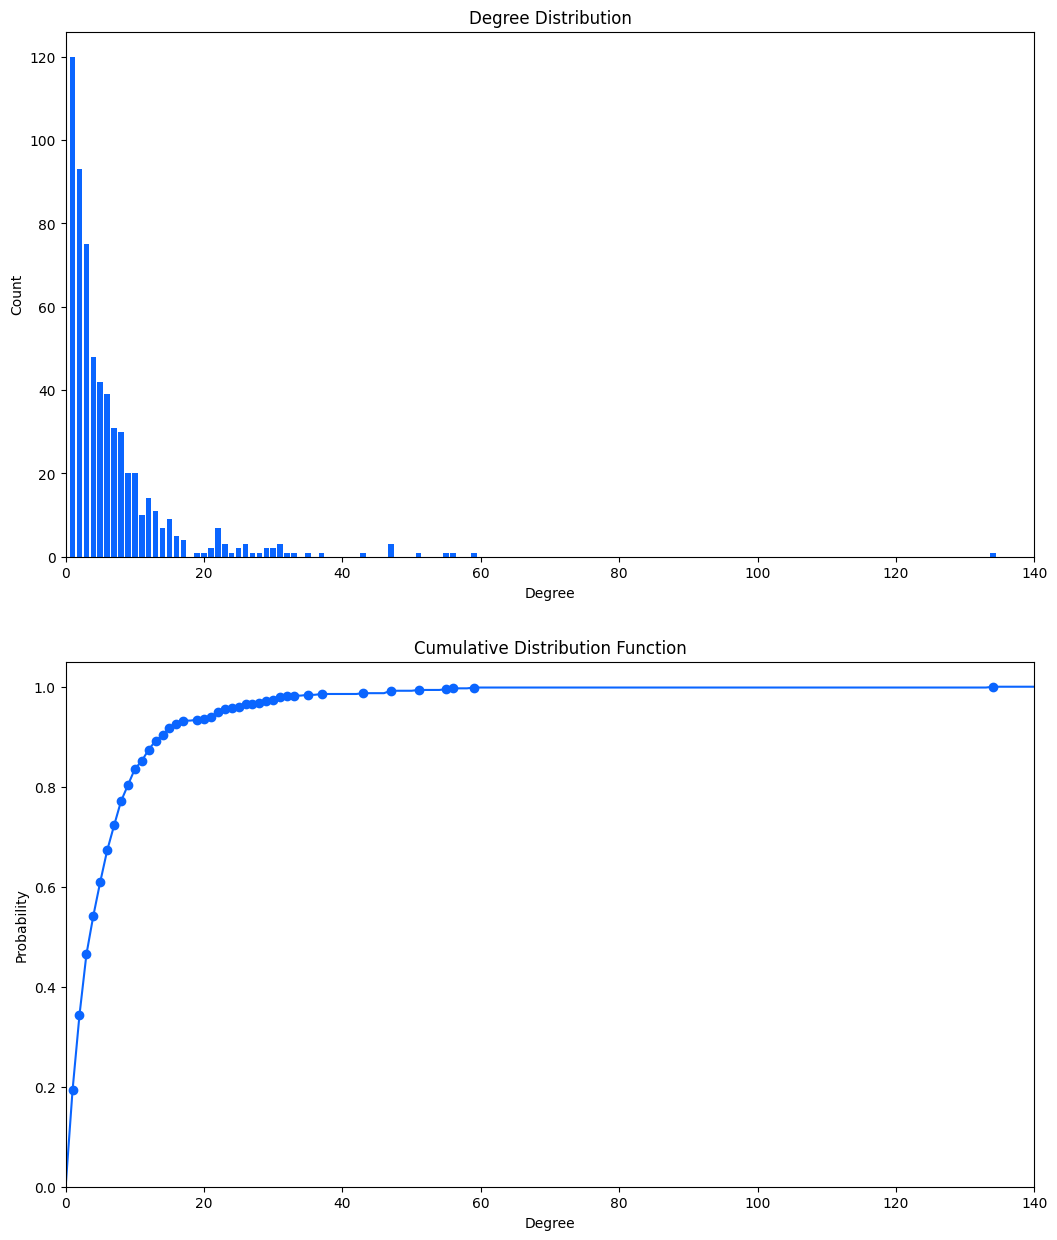

In [6]:
degrees = sorted([degree for _, degree in G.degree()],
                 reverse = True)

display(pd.Series(degrees).describe()[1:])

degree_count = np.bincount(degrees)
degree_probability = np.cumsum(degree_count) / sum(degree_count)
degree_unique_number = len(degree_count)
degree_limit = math.ceil(degree_unique_number / 10) * 10
degree_probability_extended = np.append(degree_probability, np.ones(degree_limit - len(degree_probability) + 1))

methods = [plt.bar, plt.plot, plt.scatter]
grids = [211] + [212] * 2
titles = ["Degree Distribution"] + ["Cumulative Distribution Function"] * 2
xs = [np.arange(degree_unique_number), range(len(degree_probability_extended)), np.sort(list(set(degrees)))]
ys = [degree_count, degree_probability_extended, np.sort(list(set(degree_probability)))[1:]]
y_labels = ["Count"] + ["Probability"] * 2

plt.figure(figsize = (12.5, 15))
for method, grid, title, x, y, y_label in zip(methods, grids, titles, xs, ys, y_labels):
    plt.subplot(grid)
    method(x, 
           y, 
           color = "#0a65ff")
    plt.title(label = title)
    plt.xlabel(xlabel = "Degree")
    plt.xlim(left = 0, 
             right = degree_limit)
    plt.ylabel(ylabel = y_label)
    plt.ylim(bottom = 0)
plt.show()

Mutual likes shared per food page range from one to 134. Two likes shared correspond to the first quartile, four to the second quartile, and eight to the third quartile, in line with the cumulative distribution function, demonstrating 77.1% likelihood of shared likes being equal to or smaller than eight. In consequence, an average of 6.78 is observed. Most food pages share, in turn, slightly below average likings, with some having slightly above average likings, and a few exhibiting considerable above average likings. This spread is evidenced by the 9.48 standard deviation, in excess of the mean.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 4 - Graph Properties</p>

The upcoming chapter paves the way for an in-depth analysis of the co-like graph, encompassing its central nodes and communities. This requires thorough preparation and exploration of the graph's fundamental properties, cultivating the context in which to situate the following discoveries.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">4.1 - Preprocessing</p>

In [7]:
G.remove_edges_from(nx.selfloop_edges(G))

As for the analysis of a co-liking graph, conjoint endorsement by a single source, namely an individual, is assumed. Given that conjoint signifies a mutual liking of two different food pages, a liking of only one cannot be deemed mutual, excluding self-loops. In consequence, self-loops are removed within this cell.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 150%; text-align: center; border-radius: 15px 15px;">4.2 - Analysis</p>

In [8]:
#compute graph properties
pd.Series({"connectedness": True if nx.number_connected_components(G) == 1 else False,
           "density": nx.density(G)})

connectedness        True
density          0.010897
dtype: object

The prepared co-like graph is connected in the sense that you can traverse between each pair of nodes through a series of edges. Food pages may therefore be reached from any other food page by following mutual likings. Considering the graph being connected, the average shortest path length takes precedence over global efficiency in further property analysis, due to its superior explanatory nature. It is also noteworthy that the co-like graph exhibits a 0.01 density. Density refers to the number of edges in a graph relative to all possible edges in a complete graph setting. As the co-like graph density is near zero, most food pages share very few likes, suggesting sparsity.

In [9]:
#compute graph properties
def describe_graph(G):
    return pd.Series({
        "k_connectedness": len(nx.minimum_node_cut(G)),
        "diameter": nx.diameter(G),
        "average_shortest_path_length": nx.average_shortest_path_length(G),
        "k_core": max(nx.core_number(G).values()),
        "transitivity": nx.transitivity(G),
        "average_local_clustering_coefficient": nx.average_clustering(G),
        "assortativity": nx.degree_assortativity_coefficient(G)
    })

#construct contrasting graphs
def random_graph_properties(graph_number, nodes, edges):
    graphs_random = []
    seed = 0
    while len(graphs_random) < graph_number:
        try:
            graphs_random.append(describe_graph(nx.gnm_random_graph(nodes, 
                                                                    edges, 
                                                                    seed = seed)))
        except:
            pass
        seed += 1
    return pd.concat(graphs_random, axis = 1).T.mean()

graph_comparison = random_graph_properties(10, G.number_of_nodes(), G.number_of_edges())

For all other properties, the magnitude is interpreted in comparison with graphs sharing similar structural traits. These graphs are drawn randomly, with the expected structure calculated stochastically. The Erdos-Renyi model is employed for this purpose, allowing the specification of nodes and edges, guaranteeing identical structural traits, yet preventing density deviations leading to its omission. Following the Erdos-Renyi model, 2,091 edges are arranged uniformly at random among 620 nodes over ten distinct states. By calculating the average of all properties, a single representative is obtained. 

It should be noted that reciprocity and certain notions of assortativity or connectedness do not appear in this graph, as the co-like graph is undirected. The reason being is that all edges are therefore bidirectional, implying reciprocal relationships, negating the concept of reciprocity. Moreover one cannot distinguish between indegrees and outdegrees of assortativity or weakly and strongly connectedness, which precludes these notions.

In [10]:
graph_properties = describe_graph(G)
pd.DataFrame({"graph_properties": graph_properties,
              "graph_difference": graph_properties - graph_comparison,
              "effect_size": graph_properties / graph_comparison})

,graph_properties,graph_difference,effect_size
k_connectedness,1.000000,0.000000,1.000000
diameter,17.000000,10.300000,2.537313
average_shortest_path_length,5.088697,1.506064,1.420379
k_core,11.000000,6.200000,2.291667
transitivity,0.222641,0.212313,21.556663
average_local_clustering_coefficient,0.330897,0.320647,32.283396
assortativity,-0.032203,-0.021723,3.072678


The yet-to-be-explored graph properties are scrutinized and analyzed, drawing comparisons against the benchmarks set by the average random graph. Moreover, the effect size, computed as the ratio between observed and average random properties, lends valuable insight to their interpretation of magnitude.

<b><em><span style = "font-size: 16px;">k-Connectedness</span></em></b> A graph is said to be k-connected if there is no subset of nodes within the graph's node set that, when removed, disconnects the graph. In this case, one would separate the co-like graph through removal of a single food page, thus breaking its connectedness. However, as compared to other random graphs, no significant difference is observed, as its effect size is 1, implying average cohesion given the apparent structural traits. Accordingly, the graphs in question consist at least partially of fragmented subcomponents, poorly interconnected among them, as k-connectedness is minimal.

<b><em><span style = "font-size: 16px;">Diameter</span></em></b> The diameter reflects the longest series of edges one must traverse between all pairs of nodes in the graph. Therefore, following 17 mutual likings, one would reach the food page of the pair farthest apart. This accounts for 10.3 more edges than in the average random graph, resulting in an effect size of 2.54. Hence, the co-like graph appears less compact, indicating more fragmented subcomponents.

<b><em><span style = "font-size: 16px;">Average Shortest Path Length</span></em></b> The average shortest path length in a graph corresponds to the average number of edges traversed for each pair of nodes in a shortest edge series. Thus, on average, one would reach every other food page by following 5.09 mutual likings. Hence, the random graph requires on average 1.51 fewer edges, giving rise to a 1.42 effect size. A second argument, which supports less compactness characterized by more fragmented subcomponents.

<b><em><span style = "font-size: 16px;">k-Core</span></em></b> A graph is said to be k-core in its largest subgraph where each node bears a degree of at least k. The largest k-core subgraph in the co-like graph, for food pages, is formed by those remaining, sharing eleven likes. Random graphs' average k-core lies thus 6.2 degrees below with an effect size of 2.29. This implies that the co-like graph contains fewer yet better interconnected subcomponents amidst fragmentation, contributing towards global average cohesion.

<b><em><span style = "font-size: 16px;">Transitivity</span></em></b> Transitivity in a graph refers to the ratio of closed triplets to the total number of possible closed triplets, considering both existing edges and potential edges (dyads). Thus, it can be said that if a like is shared by food pages A and B, as well B and C, chances are around 22.26% for A and C also to be liked mutually. Such transitivity exceeds that of the average random graph by 21.23%, corresponding to an effect size of 21.56. So, while the co-liking graph may be comprised of fewer cohesive subcomponents amidst fragmentation, local interactions tend to form more cohesive triplets.

<b><em><span style = "font-size: 16px;">Local Clustering Coefficient</span></em></b> A graph's local clustering coefficient refers to the average proportion of edges between neighboring nodes relative to the total potential edges. Given a shared like between food pages A and B, as well as between A and C, there is a 33.09% chance that B and C will also be mutually liked. The average lies 32.06% above the average of the random graph, equivalent to an effect size of 32.28. Another argument in favor of more pronounced cohesive subcomponents contributing to global average cohesion, given that local interactions are more prone to forming clusters.

<b><em><span style = "font-size: 16px;">Assortativity</span></em></b> Assortativity is a measure of the correlation between the degrees of interacting nodes, i.e. the tendency of nodes to interact with other nodes of similar degrees. Within the context of food pages, a negative correlation of 0.03 is evident, indicating that they tend to share likes with pages that are part of greater mutual liking. Compared to the average of random graphs, assortativity stands at a negative 0.02, resulting in an effect size of 3.07. Hence, the co-like graph suggests a stronger intertwinement between fragmented and cohesive subcomponents.

Note that all judgemental adjectives relate to the average random graph. Furthermore, the magnitude of each statement must be taken into consideration based on its effect size.

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 5 - Central Nodes</p>

Next, the measures of centrality of food pages within the co-like graph will be investigated. In consequence, useful measures of centrality will be established and compared to draw conclusions about the significance of food pages. Resulting suggestions are to be aligned with an individual's interest, forming an integral part of the upcoming chapter.

In [11]:
#compute centrality measures
def describe_nodes(G, seed = 42):
    return pd.DataFrame({
        "degree_centrality": dict(G.degree).values(),
        "closeness_centrality": nx.closeness_centrality(G),
        "betweenness_centrality": nx.betweenness_centrality(G,
                                                            seed = seed)
        },
        index = G.nodes())

node_centralities = describe_nodes(G)

#add rank
for column in node_centralities.columns:
    node_centralities[f"{column}_rank"] = node_centralities[column].rank(ascending = False).astype(int)

In this context, hubs and authorities as well as page rank are not considered useful measures of centrality. Lack of distinction between indegrees and outdegrees previously discussed blurs the line between hubs and authorities, causing loss of meaning. While pagerank declines in relevance, being proportional to the degree of centrality. Therefore, only degree, closeness, and betweenness centrality are taken into consideration.

<b><em><span style = "font-size: 16px;">Degree Centrality</span></em></b> Degree centrality measures the number of edges between a node and its neighbors. In the context of this co-like graph, it specifically indicates the shared mutual likes among food pages. A high degree centrality implies that food pages frequently receive joint endorsements.

<b><em><span style = "font-size: 16px;">Closeness Centrality</span></em></b> Closeness centrality is the reciprocal of the average number of edges traversed from one node to all other nodes in the shortest edge series. In the context of this co-like graph, closeness centrality reflects how closely a food page is, on average, to all other pages in a traversal based on mutual likings. High closeness centrality signifies extensive sharing of likings across a diverse range of niches.

<b><em><span style = "font-size: 16px;">Betweenness Centrality</span></em></b> Betweenness centrality quantifies the average proportion of shortest edge series between every other pair of nodes that pass through a specific node in a graph. Considering a co-like graph, the centrality of betweenness gauges how often a food page is traversed, on average, following mutual likings in efficiently reaching pages. Food pages exhibiting high centrality in betweenness serve as bridges in traversals between distinct niches.

In [12]:
node_centralities.sort_values(by = "degree_centrality_rank",
                              ascending = True).head(10)

,degree_centrality,closeness_centrality,betweenness_centrality,degree_centrality_rank,closeness_centrality_rank,betweenness_centrality_rank
265,132,0.331370,0.349908,1,1,1
518,59,0.244278,0.144563,2,170,3
67,56,0.290883,0.043365,3,8,23
340,55,0.289252,0.044111,4,9,22
90,51,0.298026,0.025475,5,4,44
611,47,0.302838,0.034436,7,2,31
70,47,0.298170,0.039239,7,3,27
56,47,0.294762,0.021226,7,5,55
89,43,0.280344,0.011865,9,23,84
288,37,0.286574,0.021806,10,14,52


In drawing conclusions concerning centrality measures, emphasis is placed on nodes exhibiting high degrees of centrality, as these serve as proxies for some form of prominence. Therefore, food pages, sharing many mutual likes are sought after, as they capture individuals' attention. This attention, when translated into interactions, positions these food pages as potentially ideal suggestions for individuals yet to discover them. The DataFrame is therefore sorted according to degree centrality in descending order.

Measurements indicate a strong ranking for the food page with ID 265 across all three verticals. Considering the closeness centrality of the page across all food niches, it is globally renowned. Given the food page's high betweenness centrality, potentially connecting its niche to all others without competition, it emerges as the figurehead. Accordingly, that food page is acknowledged as the "star". The relative high betweenness centrality could be attributed to a location within one of the fewer cohesive subcomponents (niches).

For food pages with IDs 518, 67, 340, 90, 611, 70, and 56, the degree of centrality is approximately half as potent as that of the "star". As compared to the "star", closeness centrality is slightly weaker for IDs 67, 340, 90, 611, 70, and 56, while betweenness centrality is negligible. On the other hand, ID 518 shows the opposite pattern. 

Given the fragmentation of the co-like graph, high closeness centrality would only be justified by high betweenness centrality, wherefore, first case food pages are assumed to belong to cohesive subcomponents (niches). However, mere presence within a cohesive subcomponent cannot justify such low betweenness centrality coupled with high closeness centrality, implying proximity to a "star". Nonetheless, it appears that these food pages are well received locally (within their niche), as to their degree of centrality, but not beyond, considering their betweenness centrality. Therefore, they are referred to as "understated standouts".

In the second scenario, low closeness centrality implies a lack of widespread recognition across all niches. When coupled with the centrality of betweenness, discrepancies may be rationalized by positioning between few fragmented subcomponents, in a connecting role, by catering different food niches. Its elevated degree centrality between those niches indicates "local" recognition. As for that, it is known as "versatile fusion".

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 6 - Community Discovery</p>

This chapter aims to align individuals' interests with food pages deemed ideal suggestions. For this purpose, community discovery algorithms will be applied, with their results compared and interpreted in terms of usability. Resulting clusterings will then be investigated for those food pages considered ideal for locating potential target groups of individuals.

In [13]:
class compute_community_clusterings:
    def __init__(self, G):
        self.graph = G

    #Girvan Newman community detection
    def gn_clustering(self):
        clustering, self.gn_cluster_modularity = max(
            ((communities, modularity(self.graph, communities)) for communities in girvan_newman(self.graph)),
            key = lambda x: x[1]
            )
        return clustering
    
    #Louvain community detection
    def lv_clustering(self, seed = 42):
        clustering = louvain_communities(self.graph,
                                         seed = seed)
        self.lv_cluster_modularity = modularity(self.graph, clustering)
        return clustering
    
    #add detected communities as properties
    def add_community_as_node_property(self, clustering, algorithm):
        for community, members in enumerate(clustering):
            for node in members:
                self.graph.nodes[node][f"{algorithm}_community"] = community
        return None

Girvan-Newman was selected as the first community discovery algorithm, a top-down iterative removal of edges based upon betweenness centrality. In this context, a graph is repeatedly divided until nodes form communities of their own. Those intermediate clusterings returned along the way may be evaluated via modularity, comparing edges across a given community to those expected at random.

Secondly, Louvain was chosen, discovering communities bottom-up through iterative optimization of modularity. In that sense nodes initially form communities of their own, repeatedly drawn at random to be fused with the neighbor of highest modularity gain, until maximized. Communities are then aggregated into nodes, and the cycle is repeated, unless a termination criteria has been met.

In [14]:
cluster = compute_community_clusterings(G = G)

In [15]:
for clustering, algorithm in zip([cluster.gn_clustering, cluster.lv_clustering], ["gn", "lv"]):
    cluster.add_community_as_node_property(clustering(), algorithm)

In [16]:
pd.Series({"gn_modularity": cluster.gn_cluster_modularity, 
           "lv_modularity": cluster.lv_cluster_modularity})

gn_modularity    0.629047
lv_modularity    0.639905
dtype: float64

Girvan Newman's clustering of highest modularity yielded a score of 0.63, slightly lower than Louvain's clustering of 0.64. Both results fall within the typical modularity range of -0.5 to 1, with the range of 0.3 to 0.7 generally considered reasonable. This implies a meaningful community structure in both clusterings. However, the decision leans toward Louvain due to its slightly higher modularity score.

In [17]:
nodes_of_relevance = ["265", "518", "67", "340", "90", "611", "70", "56"]
positions = ["star"] + ["versatile fusion"] + ["understated_standout"] * 6
pd.DataFrame({"food_page_id": nodes_of_relevance,
              "position": positions,
              "community": [G.nodes[node]["lv_community"] for node in nodes_of_relevance]})

,food_page_id,position,community
0,265,star,6
1,518,versatile fusion,10
2,67,understated_standout,6
3,340,understated_standout,6
4,90,understated_standout,6
5,611,understated_standout,6
6,70,understated_standout,6
7,56,understated_standout,6


Community discovery indicates that both "star" and "understated standout" belong to the same niche. As far as the food in this niche is concerned, it has already established global recognition via the "star", warranting suggestions in this vein, provided attention effectiveness. "Understated standouts" demonstrate attention effectiveness, as proven locally, in need of promotion beyond its own food niche. It follows that, should a like be shared with the "star" out of another food niche, "understated standouts" may be suggested to the endorser if not yet part of a mutual liking.

While the "versatile fusion" is expected to be of greatest affinity to community 10. For its "local" recognition, "versatile fusion" has already been embraced, most prominently among food enthusiasts of its most affinitized niche. The more widely embraced, the greater the likelihood of cross-niche interaction. Such interactions may be further stimulated, promoting the "versatile fusion" within the feed, in particular in its niche, whose content appears most related to. An in-depth investigation of these potential interactions is warranted, as the "versatile fusion" exposes embracers to distinct food niches, raising potential suggestions for yet untapped but compelling food niches. 

<p style="background-color:#0a65ff; font-family: arial; color: #f0f2f5; font-size: 200%; text-align: center; border-radius: 15px 15px;">Task 7 - Conclusions and Future Work</p>

The experimental analysis delved into the properties of the co-liking graph, its central nodes (food pages), and their communities. In comparison to Erdos-Renyi random graphs with comparable structural traits, the properties of the co-liking graph hinted at the existence of pronounced cohesive subcomponents woven into fragmentation. For one of these pronounced cohesive subcomponents (food niches), a food page emerged, acknowledged as the "star," globally esteemed across all food niches, while others, termed "understated standouts," garnered only local recognition. Amidst the fragmentation, a "versatile fusion" emerged, "locally", but not globally acclaimed, engaged in diverse food niches.

In light of these discoveries, the initial objective of the analysis—to derive potential suggestions within the food vertical of the Facebook network—was met and satisfied, marking a significant step in the research. The "star," having transcended its food niche, could, accordingly, serve as a trailblazer for locally recognized but globally "understated standouts" via suggestions when mutually liked. While the "versatile fusion" contents could be promoted within its most affinitized food niche, providing touch points for cross-niche interactions, given an openness, as indicated by a mutual liking.

As a first step towards putting these findings into practice, it is recommended to examine individuals' mutual likings on food pages. Therefore, a logical framework should be engineered, matching shared likings with the "star" or "versatile fusion" to produce suitable suggestions, aligned with previously stated requirements. A further step would be to draw inspiration from research rooted in subsequent interactions related to the "versatile fusion", thus inducing cross-niche suggestions. Personalized suggestions, in turn, have the potential to spark desire, stimulating interest, and ultimately prolonging user session durations.

Although this study focused on a small-scale Facebook network, it may serve as a stepping stone for future research and adaptation to larger populations. Furthermore, it may prove useful in informing algorithm choice for related machine learning challenges.

Future Work:
- Analysis of food page centrality for different focus areas (sorted according to betweenness or closeness)
- Consideration of the temporal dimension, to analyze the evolution of interest over time
- Exploration of the co-graph with weights based on the occurrence of mutual likings